<a href="https://colab.research.google.com/github/oerv13/Ibero/blob/main/Eje_Mapplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Datos base
x = np.arange(1, 6)
y1 = np.array([2, 4, 6, 8, 10])
y2 = np.array([1, 3, 5, 7, 9])
categorias = ['A', 'B', 'C', 'D', 'E']

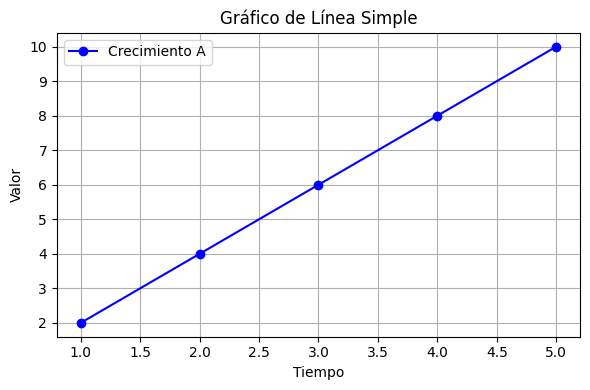

In [3]:
# 1. Gráfico simple de líneas
plt.figure(figsize=(6, 4))
plt.plot(x, y1, marker='o', linestyle='-', color='blue', label='Crecimiento A')
plt.title('Gráfico de Línea Simple')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

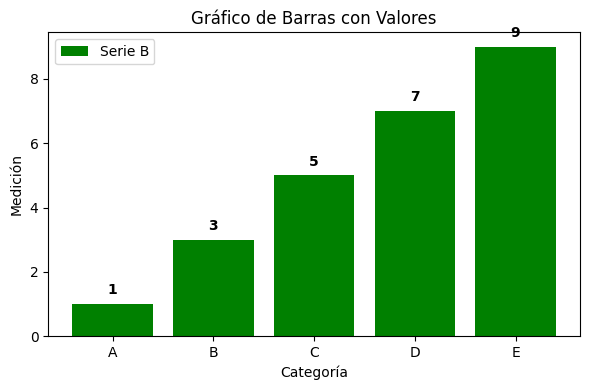

In [4]:
# 2. Gráfico de barras con etiquetas
plt.figure(figsize=(6, 4))
plt.bar(categorias, y2, color='green', label='Serie B')
for i, v in enumerate(y2):
    plt.text(i, v + 0.3, str(v), ha='center', fontweight='bold')
plt.title('Gráfico de Barras con Valores')
plt.xlabel('Categoría')
plt.ylabel('Medición')
plt.legend()
plt.tight_layout()
plt.show()

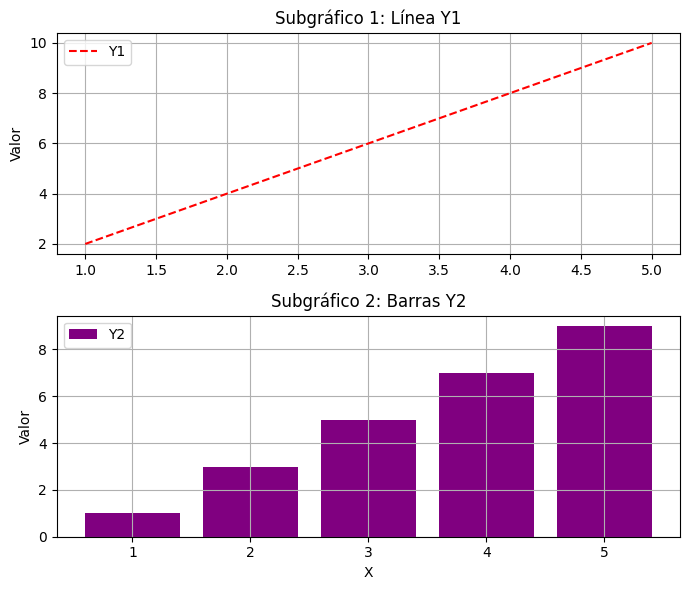

In [5]:
# 3. Gráfico compuesto (2x1)
fig, axs = plt.subplots(2, 1, figsize=(7, 6))

# Subplot 1
axs[0].plot(x, y1, 'r--', label='Y1')
axs[0].set_title('Subgráfico 1: Línea Y1')
axs[0].set_ylabel('Valor')
axs[0].legend()
axs[0].grid(True)

# Subplot 2
axs[1].bar(x, y2, color='purple', label='Y2')
axs[1].set_title('Subgráfico 2: Barras Y2')
axs[1].set_xlabel('X')
axs[1].set_ylabel('Valor')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

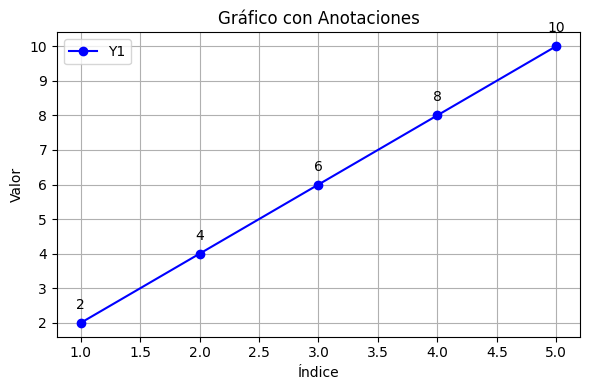

In [6]:
# 4. Gráfico con datos anotados directamente
plt.figure(figsize=(6, 4))
plt.plot(x, y1, 'bo-', label='Y1')
for i, txt in enumerate(y1):
    plt.annotate(f'{txt}', (x[i], y1[i]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Gráfico con Anotaciones')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

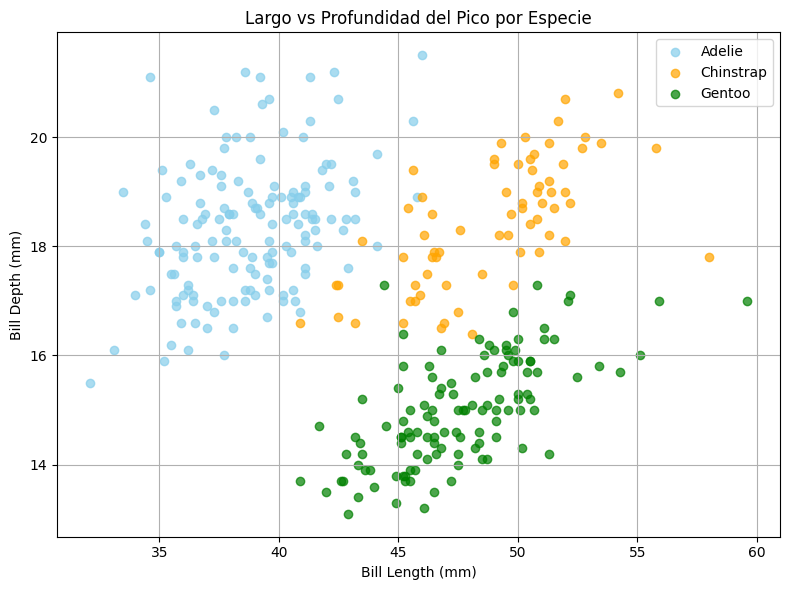

<ipython-input-7-8aa23f6fe3cc>:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_box, labels=especies, patch_artist=True,


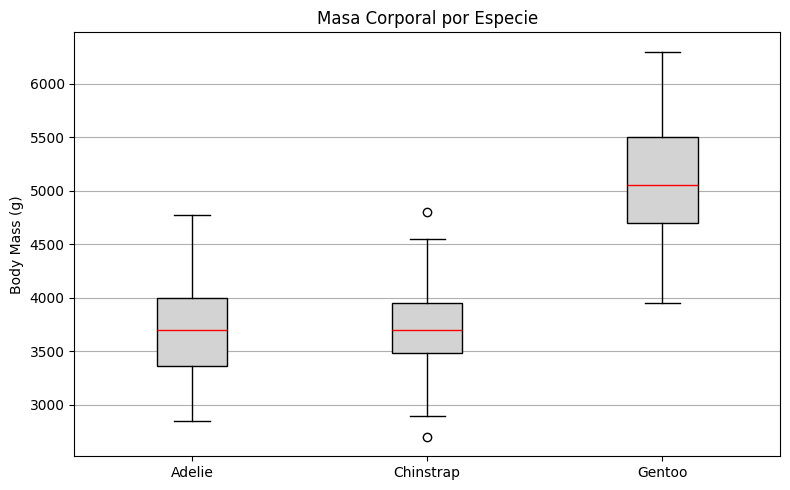

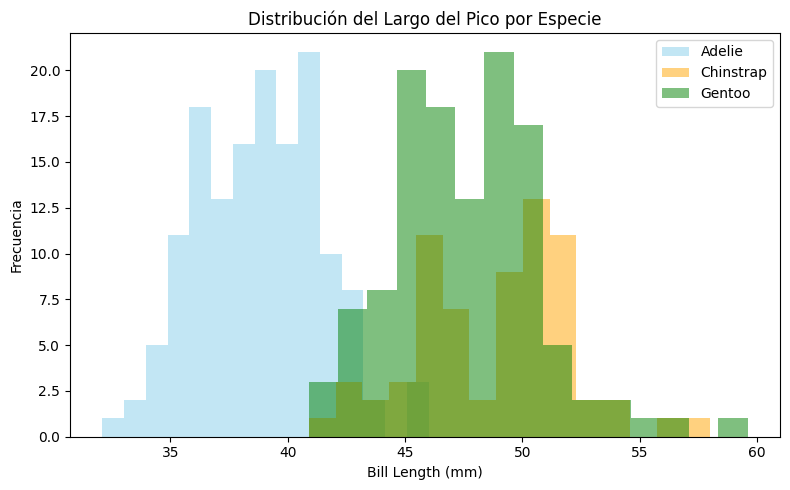

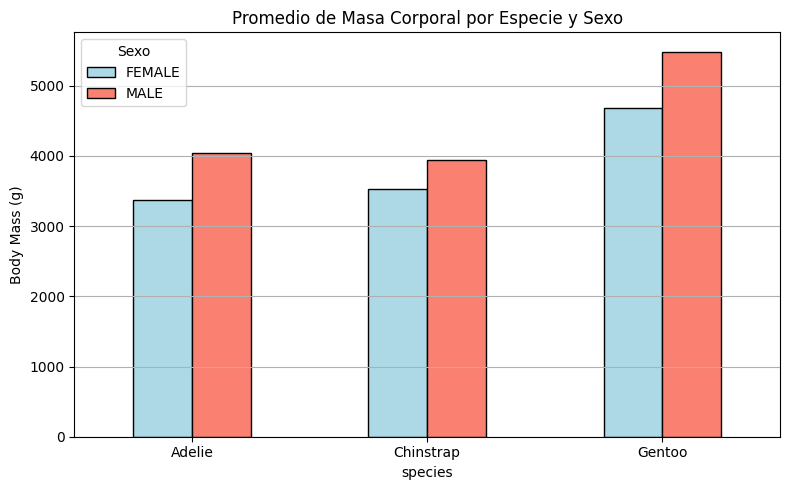

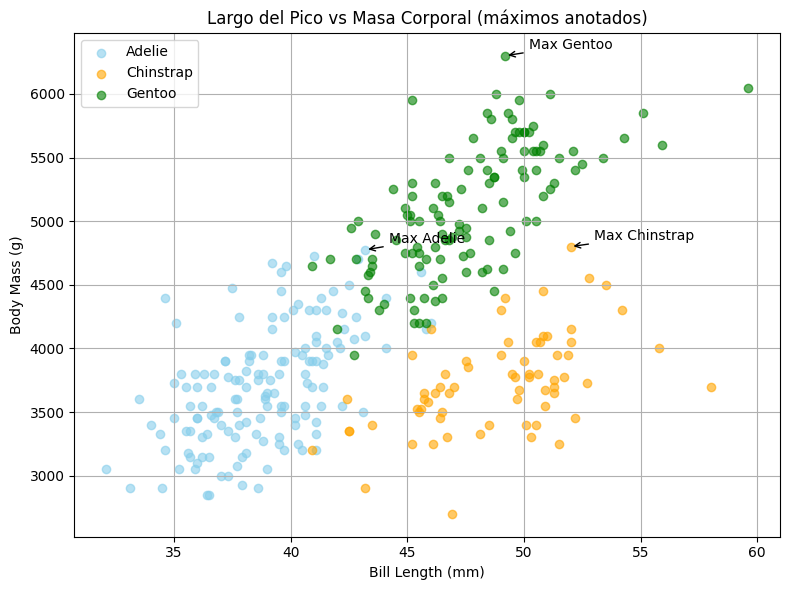

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos desde seaborn en CSV (usamos pandas solo para carga)
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)
df = df.dropna()

# Paleta de colores por especie
colores = {'Adelie': 'skyblue', 'Chinstrap': 'orange', 'Gentoo': 'green'}

# 1. Dispersión: Largo vs Profundidad del pico
plt.figure(figsize=(8, 6))
for especie in df['species'].unique():
    datos = df[df['species'] == especie]
    plt.scatter(datos['bill_length_mm'], datos['bill_depth_mm'],
                label=especie, color=colores[especie], alpha=0.7)
plt.title("Largo vs Profundidad del Pico por Especie")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Boxplot manual: masa corporal por especie
plt.figure(figsize=(8, 5))
especies = df['species'].unique()
data_box = [df[df['species'] == especie]['body_mass_g'] for especie in especies]
plt.boxplot(data_box, labels=especies, patch_artist=True,
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='red'))
plt.title("Masa Corporal por Especie")
plt.ylabel("Body Mass (g)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 3. Histograma: distribución del largo del pico por especie
plt.figure(figsize=(8, 5))
for especie in especies:
    plt.hist(df[df['species'] == especie]['bill_length_mm'],
             bins=15, alpha=0.5, label=especie, color=colores[especie])
plt.title("Distribución del Largo del Pico por Especie")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

# 4. Gráfico de barras agrupadas: promedio de masa corporal por especie y sexo
agrupado = df.groupby(['species', 'sex'])['body_mass_g'].mean().unstack()
agrupado.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'salmon'], edgecolor='black')
plt.title("Promedio de Masa Corporal por Especie y Sexo")
plt.ylabel("Body Mass (g)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

# 5. Anotación sobre gráfico: mostrar máximo por especie en dispersión
plt.figure(figsize=(8, 6))
for especie in especies:
    datos = df[df['species'] == especie]
    plt.scatter(datos['bill_length_mm'], datos['body_mass_g'], label=especie, color=colores[especie], alpha=0.6)
    max_fila = datos.loc[datos['body_mass_g'].idxmax()]
    plt.annotate(f"Max {especie}",
                 xy=(max_fila['bill_length_mm'], max_fila['body_mass_g']),
                 xytext=(max_fila['bill_length_mm'] + 1, max_fila['body_mass_g'] + 50),
                 arrowprops=dict(arrowstyle="->", color='black'))
plt.title("Largo del Pico vs Masa Corporal (máximos anotados)")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()